In [1]:
#here the relevant imports
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import os

In [2]:
data_folder='data/B737-2/'

In [3]:
os.listdir(data_folder)

['B737_SR1.rpt',
 'B737_SR2.rpt',
 'B737-19.odb',
 'B737_ULC1.rpt',
 'B737_UR1.rpt',
 'B737_ULC2.rpt',
 'B737_UR2.rpt',
 'B737_SLC2.rpt',
 'B737_SLC1.rpt',
 'B737-19.inp',
 'B737.jpg']

In [4]:
df=pd.read_table(data_folder+'B737-19.inp', skiprows=8)

In [13]:
df.head()

,*Node
0,"1, 2661., 0., 102.5"
1,"2, 2591., 0., 102.5"
2,"3, 2591., -102.5, 0."
3,"4, 2661., -102.5, 0."
4,"5, 1386., 0., 102.5"


In [6]:
df['*Node'].head()

0          1,        2661.,           0.,        102.5
1          2,        2591.,           0.,        102.5
2          3,        2591.,       -102.5,           0.
3          4,        2661.,       -102.5,           0.
4          5,        1386.,           0.,        102.5
Name: *Node, dtype: object

In [7]:
df_aileron_coordinates=df['*Node'][:6588].str.split(',', expand=True)

In [8]:
df_aileron_coordinates=df_aileron_coordinates.rename(columns={0:'label',1:'x', 2:'y', 3:'z'})

In [9]:
df_aileron_coordinates.shape

(6588, 4)

In [10]:
df_aileron_coordinates['x']=df_aileron_coordinates['x'].astype('float')
df_aileron_coordinates['y']=df_aileron_coordinates['y'].astype('float')
df_aileron_coordinates['z']=df_aileron_coordinates['z'].astype('float')

In [11]:
df_aileron_coordinates.head()

,label,x,y,z
0,1,2661.0,0.0,102.5
1,2,2591.0,0.0,102.5
2,3,2591.0,-102.5,0.0
3,4,2661.0,-102.5,0.0
4,5,1386.0,0.0,102.5


In [82]:
coordinates_a=[12,  13,  15,  36,  37,  38, 196, 197, 198, 199, 200, 246, 247, 248, 249, 250,\
 823, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890,\
 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906,\
 907, 908, 909, 910, 911, 948, 956, 957, 958, 959, 960, 961, 962]

coordinates_b=[9,  10,  32,  33,  34,  35, 179, 180, 181, 182, 183, 697, 698, 699, 700, 701,\
 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 722, 730, 731,\
 732, 733, 734, 735, 736, 749, 750, 751, 752, 753, 788, 824, 825, 826, 827, 828,\
 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841]

coordinates_c=[5,   6,  21,  22,  25,  28, 104, 105, 106, 107, 108, 390, 391, 392, 393, 394,\
 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 460, 478, 479,\
 480, 481, 482, 483, 484, 542, 543, 544, 545, 546, 558, 584, 585, 586, 587, 588,\
 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601]

coordinates_d=[2,   3,  16,  17,  20,  23,  45,  46,  47,  48,  49, 285, 286, 287, 288, 289,\
 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 325, 326, 327,\
 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 455,\
 459, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477]

coordinates_a_d=[12,  13,  15,  36,  37,  38, 196, 197, 198, 199, 200, 246, 247, 248, 249, 250,\
 823, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890,\
 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906,\
 907, 908, 909, 910, 911, 948, 956, 957, 958, 959, 960, 961, 962,\
 2,   3,  16,  17,  20,  23,  45,  46,  47,  48,  49, 285, 286, 287, 288, 289,\
 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 325, 326, 327,\
 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 455,\
 459, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477]

Plot the coordinates to have an idea of the aileron in 3D

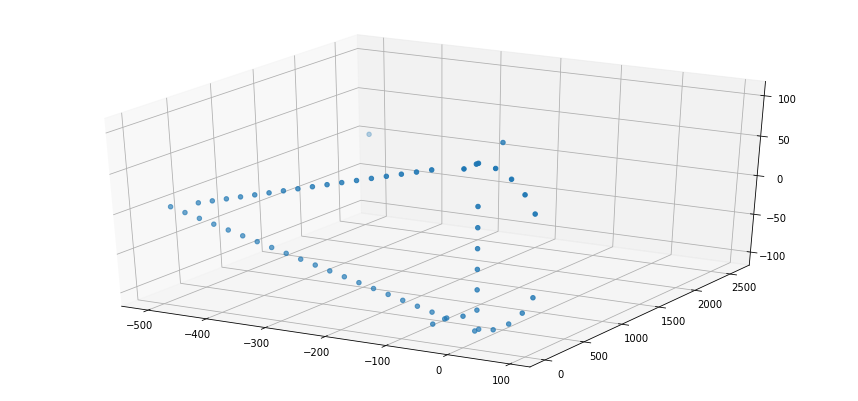

In [103]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(df_aileron_coordinates['z'].iloc[coordinates_a],df_aileron_coordinates['x'].iloc[coordinates_a], df_aileron_coordinates['y'].iloc[coordinates_a])

In [35]:
df_displacement=pd.read_csv(data_folder+'B737_ULC1.rpt', skiprows=18, nrows=6588)

In [36]:
df_displacement.head()

,-------------------------------------------------------------------------------------------------------------------------------------------------
0,1 0. ...
1,2 0. ...
2,3 0. ...
3,4 0. ...
4,5 0. ...


In [67]:
df_displacement=pd.read_table(data_folder+'B737_ULC1.rpt', skiprows=18)

In [68]:
df_displacement.head().iloc[:,0]

0                   1              0.              ...
1                   2              0.              ...
2                   3              0.              ...
3                   4              0.              ...
4                   5              0.              ...
Name: -------------------------------------------------------------------------------------------------------------------------------------------------, dtype: object

In [69]:
df_displacement_2=df_displacement.iloc[:,0][:6588].str.split(expand=True)

In [84]:
df_displacement_2=df_displacement_2[[0,5,6,7,8]]

In [85]:
df_displacement_2.head()

,0,5,6,7,8
0,1,29.9669,-173.156E-03,-29.9663,32.2019E-03
1,2,31.3388,-173.156E-03,-31.3384,-7.66482E-36
2,3,53.0662,1.88572,18.4000,-49.7384
3,4,53.5269,1.88549,19.7716,-49.7057
4,5,49.3863,36.4462E-03,-49.3846,-408.464E-03


In [88]:
df_displacement_2=df_displacement_2.rename(columns={0:'label',5:'maginitude', 6:'x', 7:'y', 8:'z'})

In [89]:
df_displacement_2.head()

,label,maginitude,x,y,z
0,1,29.9669,-173.156E-03,-29.9663,32.2019E-03
1,2,31.3388,-173.156E-03,-31.3384,-7.66482E-36
2,3,53.0662,1.88572,18.4000,-49.7384
3,4,53.5269,1.88549,19.7716,-49.7057
4,5,49.3863,36.4462E-03,-49.3846,-408.464E-03


In [91]:
df_displacement_2['x']=df_displacement_2['x'].astype('float')
df_displacement_2['y']=df_displacement_2['y'].astype('float')
df_displacement_2['z']=df_displacement_2['z'].astype('float')

In [94]:
deformations=df_displacement_2[['x','y','z']]+df_aileron_coordinates[['x','y','z']]

In [95]:
deformations.head()

,x,y,z
0,2660.826844,-29.9663,102.532202
1,2590.826844,-31.3384,102.500000
2,2592.885720,-84.1000,-49.738400
3,2662.885490,-82.7284,-49.705700
4,1386.036446,-49.3846,102.091536


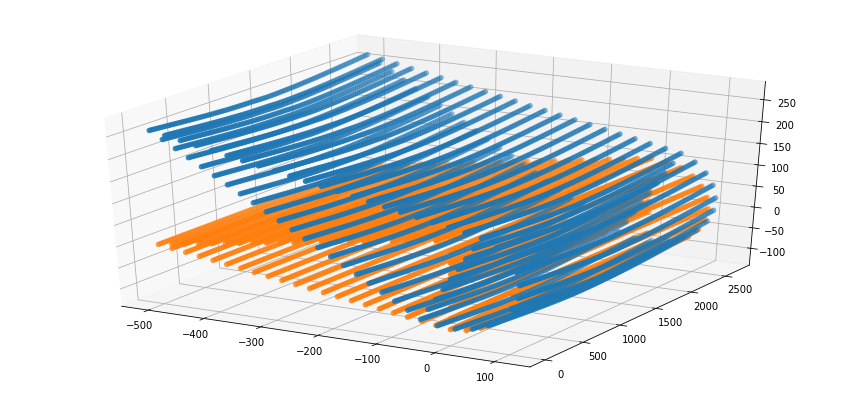

In [102]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(deformations['z'],deformations['x'], deformations['y'], 'r')
ax.scatter3D(df_aileron_coordinates['z'],df_aileron_coordinates['x'], df_aileron_coordinates['y'], 'b')